# 1. Görüntü İşleme Temelleri: Piksel, Renk Uzayları ve Görüntü Matrisi

### a. Görüntü Nedir? İnsan vs Bilgisayar Gözünden

Görüntü işleme, bilgisayar sistemlerinin dijital görüntüler üzerinde analiz, düzenleme, sınıflandırma ve yorumlama yapmasını sağlayan bir teknoloji dalıdır. İnsan gözü bir görüntüyü bütünsel, bağlama dayalı ve anlamlı bir şekilde algılar. Örneğin, bir kedi resmine baktığımızda, "kedi" kavramını hemen tanırız. Ancak **bilgisayarlar bir görüntüyü doğrudan anlamazlar**. Onlar için görüntü, sadece **sayılardan oluşan bir matris (veya matrisler)** dir.

Bu matrisler, görüntüyü oluşturan en temel yapı taşı olan **pikseller** üzerinden tanımlanır. Her piksel, bir renk değerini temsil eder. Bu değerlerin bir araya gelmesiyle resim oluşur. Dolayısıyla, bilgisayarlı görü sistemlerinin görevi, bu sayısal temsili analiz ederek, insanın anladığı anlamları (örneğin: "bu bir kedi", "bu bir trafik işareti") ortaya çıkarmaktır.

---

### b. Piksel: Görüntünün En Küçük Yapı Taşı

**Piksel (Picture Element)**, dijital bir görüntünün çözünürlüğünü belirleyen en küçük birimdir. Bir resim, satır ve sütunlardan oluşan ızgaraya benzer bir yapıya sahiptir. Bu ızgaranın her kesişim noktası bir pikseldir.

Bir pikselin değeri, o noktadaki ışık şiddetini (yoğunluğu) gösterir. Bu değerler, genellikle **0 ile 255** arasında değişen tamsayılardır:

- **0**: Tamamen siyah
- **255**: Tamamen beyaz
- Aradaki değerler: Gri tonlar

---

### c. Renk Uzayları: RGB ve Gri Tonlama

Görüntüler farklı **renk uzaylarında** temsil edilebilir. En yaygın iki türü:

1. **Gri Tonlama (Grayscale)**
    - Her piksel sadece bir sayı ile ifade edilir.
    - Bu sayı, o pikselin parlaklığını (yoğunluğunu) gösterir.
    - Matris boyutu: `yükseklik x genişlik`
    - Örnek: 3x3 boyutlu basit bir gri tonlama görüntü:

In [1]:
[ [100, 150, 200],
  [ 50, 120, 230],
  [ 80, 110, 190] ]

[[100, 150, 200], [50, 120, 230], [80, 110, 190]]

2. **Renkli Görüntü (RGB - Red, Green, Blue)**
    - Her piksel, üç sayıdan oluşan bir vektörle temsil edilir.
    - Bu üç değer sırasıyla kırmızı, yeşil ve mavi kanallarındaki yoğunluğu belirtir.
    - Matris boyutu: `yükseklik x genişlik x 3`
    - Örnek: 1x1 boyutlu bir renkli piksel: `[255, 0, 0]` → Tam kırmızı

### d. Görüntüyü Matris Olarak Temsil Etmek

Bir dijital görüntü, matematiksel olarak bir **3-boyutlu tensör** olarak ifade edilir:

- **2 boyut**: Piksel konumu (satır, sütun)
- **1 boyut**: Renk kanalı (R, G, B)

Örneğin, `128x128` boyutunda bir RGB resmi:

- Toplam piksel sayısı: 128 × 128 = 16,384
- Her piksel 3 değer (R, G, B) içerir → Toplam 16,384 × 3 = 49,152 sayı

Bu yapı, görüntü işleme algoritmalarının (özellikle derin öğrenme modellerinin) giriş verisi olarak kullandığı formattır.

---

### e. Python ile Görüntü Okuma ve Matris Gösterimi

Aşağıdaki örnek, bir görüntüyü okuyup içeriğini matris olarak görüntülememizi sağlar. Bu işlem için `OpenCV` ve `matplotlib` kütüphaneleri kullanılacaktır.

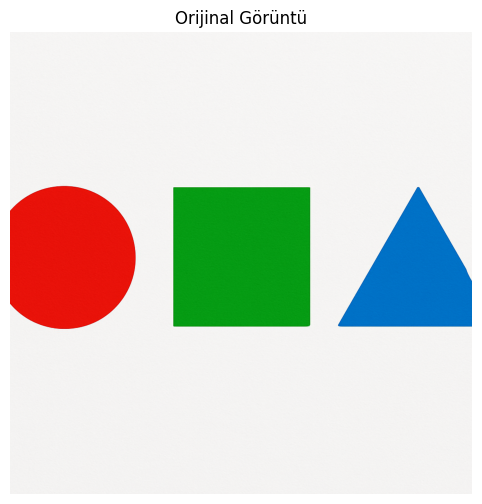

Görüntü şekli (yükseklik, genişlik, kanal): (1024, 1024, 3)
Veri tipi: uint8
Piksel değer aralığı: 0 - 255

İlk 5x5 alanın RGB matrisi:
[[[245 244 244]
  [247 245 245]
  [247 245 243]
  [246 244 243]
  [246 245 244]]

 [[247 244 244]
  [246 245 243]
  [246 246 244]
  [247 244 245]
  [245 244 244]]

 [[247 245 244]
  [245 246 245]
  [247 247 246]
  [248 246 245]
  [247 245 245]]

 [[245 244 244]
  [247 247 244]
  [247 246 244]
  [248 246 246]
  [248 247 245]]

 [[245 244 244]
  [244 243 242]
  [246 245 244]
  [247 246 245]
  [248 247 245]]]


In [2]:
# Gerekli kütüphaneleri yükle
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 1. Görüntüyü oku (BGR formatında okur OpenCV)
image_bgr = cv2.imread('ornek_resim.png')

# 2. BGR'yi RGB'ye çevir (matplotlib düzgün gösterim için)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 3. Görüntüyü ekrana bastır
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title("Orijinal Görüntü")
plt.axis('off')  # Eksenleri gizle
plt.show()

# 4. Görüntünün matris yapısını incele
print("Görüntü şekli (yükseklik, genişlik, kanal):", image_rgb.shape)
print("Veri tipi:", image_rgb.dtype)
print("Piksel değer aralığı:", image_rgb.min(), "-", image_rgb.max())

# 5. İlk 5x5 alanını matris olarak göster
print("\nİlk 5x5 alanın RGB matrisi:")
print(image_rgb[0:5, 0:5])


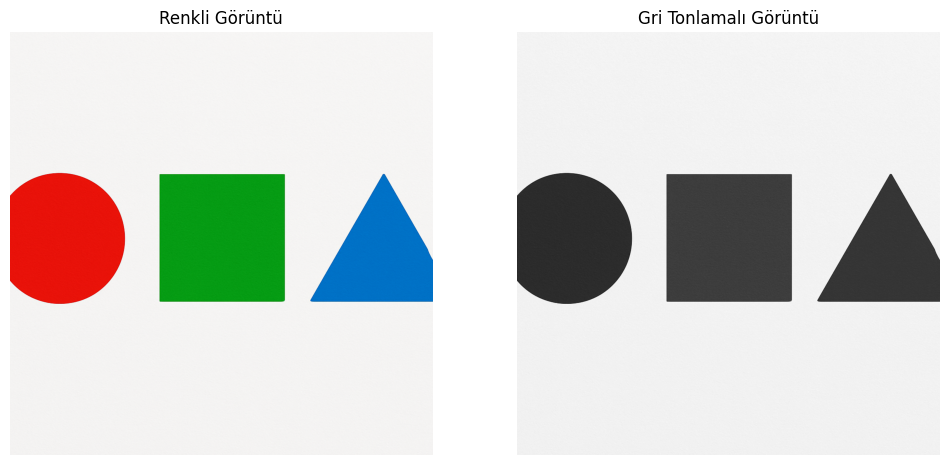

Gri tonlamalı şekil: (1024, 1024)


In [3]:
# Gri tonlamalı hali
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Renkli Görüntü")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap='gray')
plt.title("Gri Tonlamalı Görüntü")
plt.axis('off')

plt.show()
print("Gri tonlamalı şekil:", image_gray.shape)  # (yükseklik, geni